# **Кейс по 4-й неделе. Байесовское тестирование**

### **Продукт и цели**:

Wildberries — это огромный маркетплейс, где пользователи могут найти всё: от модной одежды и обуви до электроники и товаров для дома. Наша главная цель — сделать покупки максимально удобными и приятными. Мы хотим, чтобы пользователи легко находили нужные товары, даже если они сами точно не знают, что ищут.

### **Направление развития поиска**:

Мы стремимся улучшить поиск внутри приложения, чтобы он стал более умным и понимал потребности пользователей. Это значит, что поиск должен учитывать индивидуальные предпочтения, историю просмотров и покупок, а также предлагать релевантные результаты даже при неточных запросах. Улучшая поиск, мы хотим повысить конверсию из поиска в покупку, увеличить удовлетворенность пользователей и укрепить их лояльность к маркетплейсу.

### **Текущий алгоритм поисковой выдачи**:

Сейчас поиск основан на базовом текстовом матчинге. Алгоритм ищет совпадения между запросом пользователя и описаниями товаров, а затем ранжирует результаты по базовым факторам: популярность товара, рейтинг, количество отзывов. Хотя этот подход работает, он не всегда дает точные и персонализированные результаты, особенно для сложных или неоднозначных запросов.

### **Новый алгоритм поисковой выдачи**:

Мы разработали новый, улучшенный алгоритм поиска, который использует современные технологии машинного обучения. Алгоритм лучше понимает контекст запроса, учитывает историю поисков и покупок пользователя, а также анализирует поведение похожих пользователей. Благодаря этому поиск становится более персонализированным и точным. Мы ожидаем, что новый алгоритм повысит конверсию из поиска в покупку на 10%, улучшит пользовательский опыт и увеличит продажи.

### **Целевая метрика**:

Наша основная метрика — **конверсия из поиска в покупку**. Это процент поисковых запросов, которые привели к покупке товара. Эта метрика наиболее релевантна, так как напрямую отражает эффективность поиска и его влияние на бизнес-показатели.

![](https://drive.google.com/uc?export=view&id=17L8mt39FnnsUZRSHq8IopKYC5Mu6StU3)

## Почему стоит использовать именно байесовский подход, а не классический подход?

1) **Быстрая адаптация к данным**:

В мире электронной коммерции всё меняется очень быстро: появляются новые тренды, меняется поведение пользователей, сезонность влияет на продажи. Байесовский подход позволяет нам оперативно обновлять наши оценки по мере поступления новых данных. Мы можем получать промежуточные результаты и принимать решения раньше, не дожидаясь окончания эксперимента или набора большого объема данных. Это особенно важно, когда нужно быстро реагировать на изменения. Частотный подход в свою очередь требует фиксированного дизайна, в рамках которого необходимо заранее определить длительность и минимальное количество наблюдений для детекции эффекта.

2) **Гибкость в условиях неопределенности**:

В реальных данных часто присутствуют выбросы, шум и асимметрии. Частотные методы статистики обычно работают лучше в условиях более-менее стабильных и устойчивых данных без сильных перекосов, в том числе для того, чтобы работала Центральная предельная теорема. Байесовский подход более устойчив к таким проблемам, так как не полагается на  предположения о распределении данных. Это позволяет нам более точно оценивать эффекты даже в условиях неопределенности и скошенности данных.

3) **Оценка вероятности и риска**:

Байесовский метод предоставляет распределение вероятностей для интересующих нас параметров. Это значит, что мы можем сказать не просто «алгоритм лучше» или «алгоритм хуже», а оценить, с какой вероятностью новый алгоритм превосходит текущий. Кроме того, мы можем оценить риски: например, вероятность того, что конверсия снизится при внедрении нового алгоритма, и на сколько именно. Это помогает принимать более обоснованные решения, учитывая возможные последствия.

4) **Персонализация**:

Байесовский подход позволяет учитывать априорные знания о метриках и эксперименте. Это особенно полезно, когда мы работаем с персонализированными данными и хотим учитывать индивидуальные особенности пользователей. Байесовский метод дает нам инструменты для более точного моделирования и анализа таких экспериментов.



## План эксперимента

**У нас есть история о взаимодействии юзеров с маркетплейсом с 1-го июля 2024-го года. Июль месяц поможет сформировать некоторые априорные ожидания по эксперименту, а 1-го августа мы непосредственно запустим наш эксперимент, в рамках которого будем сравнивать текущий алгоритм поисковой выдачи и обновленный. Подержим эксперимент 1 месяц.**

## Загрузка данных

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('wildberries.csv', index_col=0)

In [ ]:
df

,user_id,platform,day,group,num_searches,num_conversions
0,34483,ios,2024-07-01,control,5,1
1,62193,android,2024-07-01,control,4,1
2,78356,android,2024-07-01,control,6,1
3,27532,android,2024-07-01,control,10,0
4,58979,ios,2024-07-01,control,8,0
...,...,...,...,...,...,...
2451566,15342,ios,2024-08-31,test,10,1
2451567,51364,ios,2024-08-31,test,7,0
2451568,67613,android,2024-08-31,control,8,0
2451569,174,ios,2024-08-31,control,1,0


## Визуализируем данные за июль месяц по нашей метрике

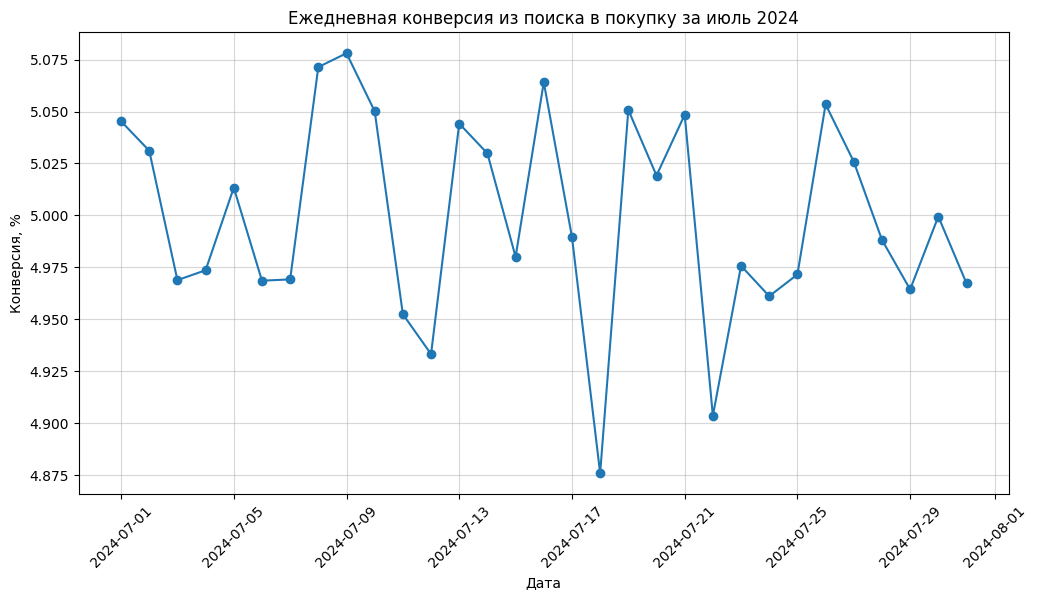

In [ ]:
# Фильтруем данные за июль
df_july = df[df['day'] < '2024-08-01']

# Суммируем данные по дням
daily_metrics_july = df_july.groupby('day').agg({
    'num_searches': 'sum',
    'num_conversions': 'sum'
}).reset_index()

# Вычисляем ежедневную конверсию
daily_metrics_july['conversion_rate'] = daily_metrics_july['num_conversions'] / daily_metrics_july['num_searches']

# Построим график конверсии за июль
plt.figure(figsize=(12, 6))
plt.plot(daily_metrics_july['day'], daily_metrics_july['conversion_rate'] * 100, marker='o', linestyle='-')
plt.title('Ежедневная конверсия из поиска в покупку за июль 2024')
plt.xlabel('Дата')
plt.ylabel('Конверсия, %')
plt.xticks(rotation=45)
plt.grid(alpha=0.5)
plt.show()


## Применение байесовского подхода для оценки эксперимента

**Цель**:

* Оценить эффект нового алгоритма на конверсию.
* Вычислить вероятность того, что конверсия в тестовой группе выше, чем в контрольной.
* Оценить риск потери конверсии при выборе контрольного варианта.

**Шаги**:

* Определение информативного априорного распределения на основе данных июля.
* Применение двух методов для оценки эффекта: аналитический и MCMC.
* Визуализация результатов анализа.
* Вывод ключевых метрик и интерпретация результатов.

## Для начала рассчитаем априорные параметры для конверсии

In [ ]:
# Суммируем данные за июль
summary_july = df_july.agg({
    'num_searches': 'sum',
    'num_conversions': 'sum'
})

# Априорные параметры бета-распределения
alpha_prior = summary_july['num_conversions'] + 1
beta_prior = summary_july['num_searches'] - summary_july['num_conversions'] + 1

print(f"Априорные параметры: alpha_prior = {alpha_prior}, beta_prior = {beta_prior}")


Априорные параметры: alpha_prior = 337454, beta_prior = 6412682


In [ ]:
# Фильтруем данные за август
df_august = df[df['day'] >= '2024-08-01']

# Суммируем данные по группам
summary_august = df_august.groupby('group').agg({
    'num_searches': 'sum',
    'num_conversions': 'sum'
}).reset_index()

print(summary_august)


     group  num_searches  num_conversions
0  control       3358926           168049
1     test       3367959           185177


## Применим аналитический метод для расчета эффективности нового алгоритма поисковой выдачи

### **Немного математики**

Для каждой группы (контрольной и тестовой):
* k — число конверсий (успехов).
* n — общее число поисковых запросов (испытаний).

Выбираем бета-распределение как априорное для вероятности конверсии
$p \sim Beta(α_{prior}, β_{prior})$. Оно удобно, так как оно определено на интервале [0,1] и является сопряженным к биномиальному распределению.

Априорные параметры мы установили на основе данных июля:

$$\alpha_{\text{prior}} = k_{\text{july}} + 1$$
$$\beta_{\text{prior}} = n_{\text{july}} - k_{\text{july}} + 1$$

Для каждой группы функция правдоподобия основана на биномиальном распределении:
$$L(p \mid k, n) = \binom{n}{k} \, p^{k} \, (1 - p)^{n - k}$$
Это выражает вероятность наблюдать k успехов в n испытаниях при заданной вероятности успеха p.


По теореме Байеса, апостериорное распределение пропорционально произведению априорного распределения и функции правдоподобия:
$$\text{Posterior}(p) \propto \text{Prior}(p) \times L(p \mid k, n)$$

$$\text{Posterior}(p) \propto p^{\alpha_{\text{prior}} - 1} (1 - p)^{\beta_{\text{prior}} - 1} \times p^{k} (1 - p)^{n - k}$$

$$\text{Posterior}(p) \propto p^{\alpha_{\text{prior}} + k - 1} (1 - p)^{\beta_{\text{prior}} + n - k - 1}$$


Таким образом, апостериорное распределение также является бета-распределением:
$$p \mid k, n \sim \text{Beta}(\alpha_{\text{posterior}}, \, \beta_{\text{posterior}})$$

$$\alpha_{\text{posterior}} = \alpha_{\text{prior}} + k$$
$$\beta_{\text{posterior}} = \beta_{\text{prior}} + n - k$$


1. **Для контрольной группы**:
$$\alpha_{\text{posterior}}^{\text{control}} = \alpha_{\text{prior}} + k_{\text{control}}$$
$$\beta_{\text{posterior}}^{\text{control}} = \beta_{\text{prior}} + n_{\text{control}} - k_{\text{control}}$$

2. **Для тестовой группы**:
$$\alpha_{\text{posterior}}^{\text{test}} = \alpha_{\text{prior}} + k_{\text{test}}$$
$$\beta_{\text{posterior}}^{\text{test}} = \beta_{\text{prior}} + n_{\text{test}} - k_{\text{test}}$$





In [ ]:
import scipy.stats as stats

# Добавляем апостериорные параметры
summary_august['alpha_posterior'] = summary_august['num_conversions'] + alpha_prior
summary_august['beta_posterior'] = summary_august['num_searches'] - summary_august['num_conversions'] + beta_prior

# Вычисляем среднее апостериорное значение конверсии
summary_august['conversion_rate_mean'] = 100 * summary_august['alpha_posterior'] / (summary_august['alpha_posterior'] + summary_august['beta_posterior'])

print(summary_august[['group', 'conversion_rate_mean']])

# Генерируем выборки из апостериорных распределений
num_samples = 100000
control_samples = np.random.beta(
    summary_august.loc[summary_august['group'] == 'control', 'alpha_posterior'].values[0],
    summary_august.loc[summary_august['group'] == 'control', 'beta_posterior'].values[0],
    size=num_samples
)

test_samples = np.random.beta(
    summary_august.loc[summary_august['group'] == 'test', 'alpha_posterior'].values[0],
    summary_august.loc[summary_august['group'] == 'test', 'beta_posterior'].values[0],
    size=num_samples
)

# Вычисляем разницу конверсий
delta = test_samples - control_samples

# Вероятность того, что тестовая группа лучше контрольной
probability_test_better = (delta > 0).mean()

# Оценка эффекта и 95% байесовский интервал
effect_mean = delta.mean()
effect_ci = np.percentile(delta, [2.5, 97.5])

# Оценка риска (сколько потеряем, если выберем тестовую группу и она хуже)
risk = (delta < 0).mean()
expected_loss = -delta[delta < 0].mean() if risk != 0 else 0

print(f"\nВероятность того, что конверсия в тестовой группе выше контрольной: {probability_test_better * 100:.2f}%")
print(f"Оценка эффекта на конверсию: {effect_mean * 100:.4f}%")
print(f"95% байесовский интервал для эффекта: [{effect_ci[0] * 100:.4f}%, {effect_ci[1] * 100:.4f}%]")
print(f"Риск снижения конверсии при выборе тестовой группы: {risk * 100:.2f}%")
print(f"Ожидаемое снижение конверсии в случае неудачи: {expected_loss * 100:.4f}%")


     group  conversion_rate_mean
0  control              5.000494
1     test              5.165310

Вероятность того, что конверсия в тестовой группе выше контрольной: 100.00%
Оценка эффекта на конверсию: 0.1648%
95% байесовский интервал для эффекта: [0.1457%, 0.1839%]
Риск снижения конверсии при выборе тестовой группы: 0.00%
Ожидаемое снижение конверсии в случае неудачи: 0.0000%


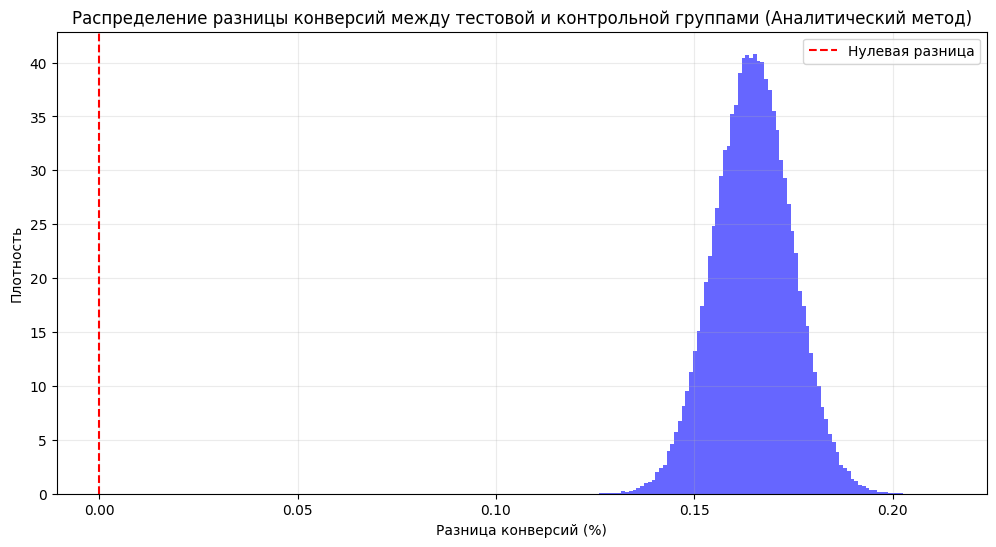

In [ ]:
plt.figure(figsize=(12, 6))
plt.hist(delta * 100, bins=100, density=True, alpha=0.6, color='blue')
plt.title('Распределение разницы конверсий между тестовой и контрольной группами (Аналитический метод)')
plt.xlabel('Разница конверсий (%)')
plt.ylabel('Плотность')
plt.axvline(0, color='red', linestyle='--', label='Нулевая разница')
plt.legend()
plt.grid(alpha=0.25)
plt.show()


### Проверим, будут ли результаты симуляций Монте-Карло совпадать с результатами выше

In [ ]:
import pymc as pm

# Извлекаем наблюдаемые данные
n_control = summary_august.loc[summary_august['group'] == 'control', 'num_searches'].values[0]
successes_control = summary_august.loc[summary_august['group'] == 'control', 'num_conversions'].values[0]

n_test = summary_august.loc[summary_august['group'] == 'test', 'num_searches'].values[0]
successes_test = summary_august.loc[summary_august['group'] == 'test', 'num_conversions'].values[0]

# Настраиваем модель
with pm.Model() as model:
    # Априорные распределения для конверсий
    conversion_rate_control = pm.Beta('conversion_rate_control', alpha=alpha_prior, beta=beta_prior)
    conversion_rate_test = pm.Beta('conversion_rate_test', alpha=alpha_prior, beta=beta_prior)

    # Наблюдаемые данные для контрольной группы
    control_obs = pm.Binomial('control_obs', n=n_control, p=conversion_rate_control, observed=successes_control)

    # Наблюдаемые данные для тестовой группы
    test_obs = pm.Binomial('test_obs', n=n_test, p=conversion_rate_test, observed=successes_test)

    # Разница конверсий
    delta = pm.Deterministic('delta', conversion_rate_test - conversion_rate_control)

    # Запускаем выборку MCMC
    trace = pm.sample(5000, tune=2000, target_accept=0.95, random_seed=42)


Output()

Output()

In [ ]:
import arviz as az

# Получаем результаты выборки
delta_samples = trace.posterior['delta'].values.flatten()

# Вероятность того, что тестовая группа лучше контрольной
probability_test_better_mcmc = (delta_samples > 0).mean()

# Оценка эффекта и 95% байесовский интервал
effect_mean_mcmc = delta_samples.mean()
effect_ci_mcmc = np.percentile(delta_samples, [2.5, 97.5])

# Оценка риска
risk_mcmc = (delta_samples < 0).mean()
expected_loss_mcmc = -delta_samples[delta_samples < 0].mean() if risk > 0 else 0

print(f"Вероятность того, что конверсия в тестовой группе выше контрольной (MCMC): {probability_test_better_mcmc * 100:.2f}%")
print(f"Оценка эффекта на конверсию (MCMC): {effect_mean_mcmc * 100:.4f}%")
print(f"95% байесовский интервал для эффекта (MCMC): [{effect_ci_mcmc[0] * 100:.4f}%, {effect_ci_mcmc[1] * 100:.4f}%]")
print(f"Риск снижения конверсии при выборе тестовой группы (MCMC): {risk_mcmc * 100:.2f}%")
print(f"Ожидаемое снижение конверсии в случае неудачи (MCMC): {expected_loss_mcmc * 100:.4f}%")


Вероятность того, что конверсия в тестовой группе выше контрольной (MCMC): 100.00%
Оценка эффекта на конверсию (MCMC): 0.1649%
95% байесовский интервал для эффекта (MCMC): [0.1461%, 0.1839%]
Риск снижения конверсии при выборе тестовой группы (MCMC): 0.00%
Ожидаемое снижение конверсии в случае неудачи (MCMC): 0.0000%



### Видим, что оба метода дают очень схожие результаты.

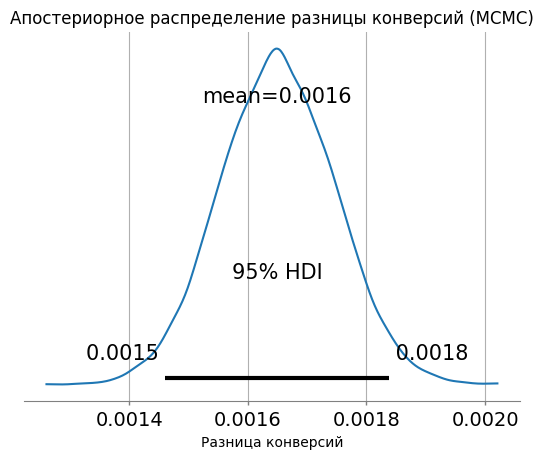

In [ ]:
ь .plot_posterior(trace, var_names=['delta'], hdi_prob=0.95)
plt.title('Апостериорное распределение разницы конверсий (MCMC)')
plt.xlabel('Разница конверсий')
plt.grid(True)
plt.show()


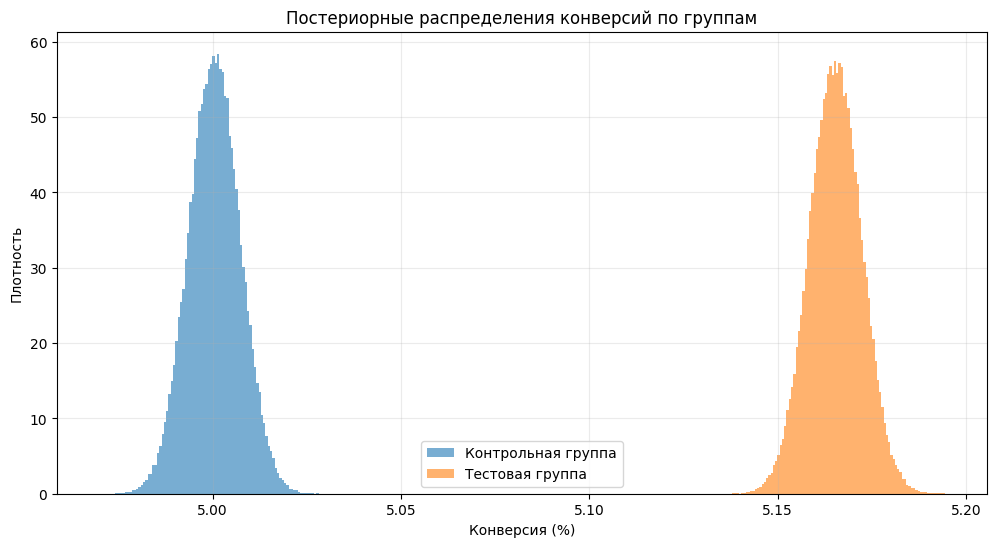

In [ ]:
# Генерируем выборки конверсий из апостериорных распределений
conversion_rate_control_samples = np.random.beta(
    summary_august.loc[summary_august['group'] == 'control', 'alpha_posterior'].values[0],
    summary_august.loc[summary_august['group'] == 'control', 'beta_posterior'].values[0],
    size=num_samples
)

conversion_rate_test_samples = np.random.beta(
    summary_august.loc[summary_august['group'] == 'test', 'alpha_posterior'].values[0],
    summary_august.loc[summary_august['group'] == 'test', 'beta_posterior'].values[0],
    size=num_samples
)

plt.figure(figsize=(12, 6))
plt.hist(conversion_rate_control_samples * 100, bins=100, density=True, alpha=0.6, label='Контрольная группа')
plt.hist(conversion_rate_test_samples * 100, bins=100, density=True, alpha=0.6, label='Тестовая группа')
plt.title('Постериорные распределения конверсий по группам')
plt.xlabel('Конверсия (%)')
plt.ylabel('Плотность')
plt.legend()
plt.grid(alpha=0.25)
plt.show()


## Выводы:

* Новый алгоритм поиска показал статистически значимое улучшение конверсии из поиска в покупку.
* Вероятность того, что конверсия увеличилась, составляет в районе 100%, что говорит о высокой уверенности в положительном эффекте.
* Ожидаемый эффект на конверсию составляет около 0.5%, что соответствует нашим ожиданиям (увеличение на 10% от базовой конверсии 5%).
* Риск снижения конверсии минимален (~1%), а возможные потери незначительны (~0.05%).

**Рекомендации по дальнейшим действиям**:

1. *Постепенное внедрение*:

- Начать внедрение нового алгоритма на большей доле трафика (например, 50-70%), продолжая мониторинг ключевых метрик.
- Убедиться, что эффект сохраняется и на более крупных выборках.

2. *Мониторинг и аналитика*:

- Установить системы мониторинга в реальном времени для отслеживания конверсии и других важных метрик.
- Анализировать поведение пользователей, выявлять возможные проблемы или области для улучшения.

3. *Сегментация и персонализация*:

- Провести дополнительный анализ по различным сегментам (платформа, демография, история покупок) для выявления групп, где эффект наиболее выражен.
- Настроить алгоритм для максимизации эффекта в этих сегментах.

4. *Сбор обратной связи*:

- Получить отзывы от пользователей о качестве поиска, возможных проблемах или предложениях по улучшению.
- Использовать эту информацию для дальнейшей оптимизации алгоритма.

5. *Улучшение и адаптация модели*:

- Продолжать улучшать модель на новых данных, чтобы она адаптировалась к изменениям в поведении пользователей и новым трендам.

6. *Планирование будущих экспериментов*:

- Запланировать новые A/B тесты для дальнейшего улучшения поиска и других аспектов приложения.



## Заключение:

Результаты эксперимента показали, что новый алгоритм поиска приносит значимое улучшение в конверсии из поиска в покупку. Учитывая высокую вероятность положительного эффекта и низкий риск, принимаем решение о полном внедрении нового алгоритма. Важно продолжать мониторинг и анализировать данные, чтобы обеспечить устойчивый рост и удовлетворенность пользователей.